In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio


In [ ]:
#Load Audio Files (Instrument 1 & Instrument 2)
TARGET_SR = 16050
DURATION = 4  # seconds

def load_audio(path):
    y, sr = librosa.load(path, sr=TARGET_SR)
    y = y[:int(sr * DURATION)]  # trim to 4 sec
    return y, sr

# Paths
instrument1_path = "/content/Jailer Flute.mp3"
instrument2_path = "/content/Santur.mp3"

instrument1_y, sr = load_audio(instrument1_path)
instrument2_y, sr = load_audio(instrument2_path)


In [ ]:
# Play Audio
print("🎼 Instrument 1 Audio")
display(Audio(instrument1_y, rate=sr))

print("🎼 Instrument 2 Audio")
display(Audio(instrument2_y, rate=sr))


🎼 Instrument 1 Audio


🎼 Instrument 2 Audio


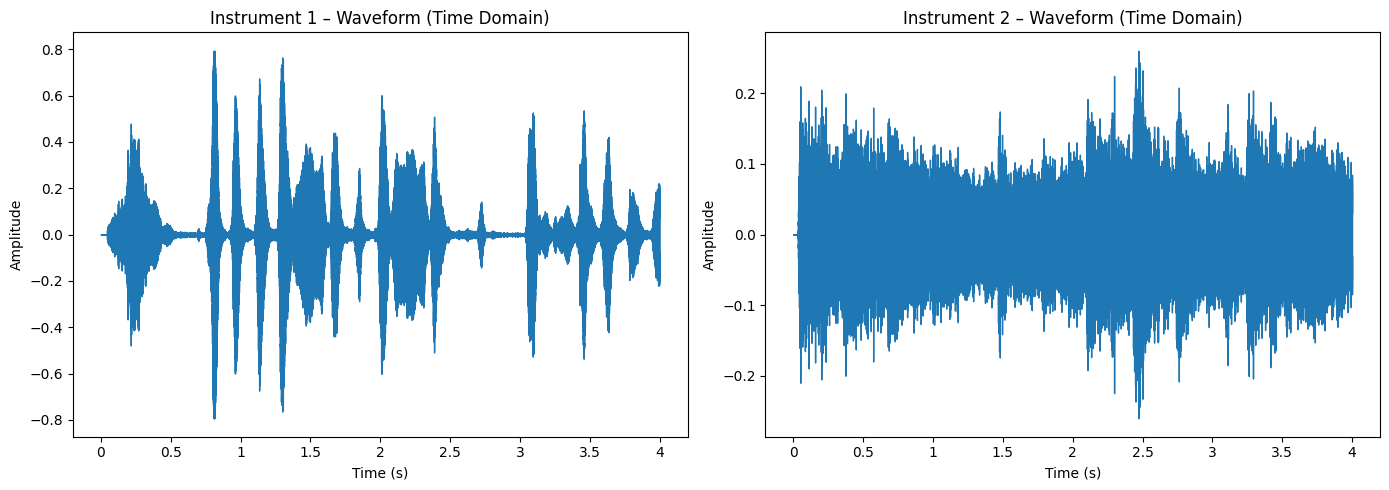

In [ ]:
#Plot Waveform (Time Domain)
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))

# Instrument 1 Waveform
plt.subplot(1, 2, 1)
librosa.display.waveshow(instrument1_y, sr=sr)
plt.title("Instrument 1 – Waveform (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Instrument 2 Waveform
plt.subplot(1, 2, 2)
librosa.display.waveshow(instrument2_y, sr=sr)
plt.title("Instrument 2 – Waveform (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()



In [ ]:
#Compute STFT Spectrograms
def compute_stft(y):
    D = np.abs(librosa.stft(y, n_fft=1024, hop_length=256))
    return librosa.amplitude_to_db(D, ref=np.max)

instrument1_stft = compute_stft(instrument1_y)
instrument2_stft = compute_stft(instrument2_y)


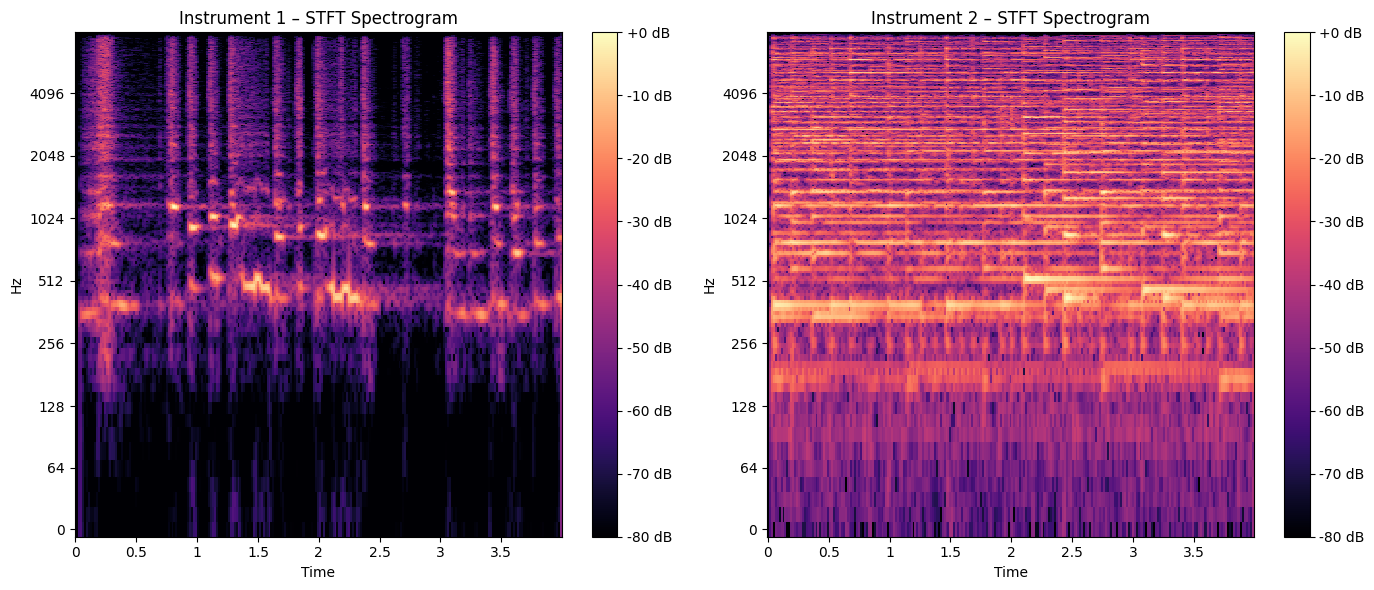

In [ ]:
# Plot STFT Comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
librosa.display.specshow(instrument1_stft, sr=sr, hop_length=256,
                         x_axis="time", y_axis="log")
plt.title("Instrument 1 – STFT Spectrogram")
plt.colorbar(format="%+2.0f dB")

plt.subplot(1, 2, 2)
librosa.display.specshow(instrument2_stft, sr=sr, hop_length=256,
                         x_axis="time", y_axis="log")
plt.title("Instrument 2 – STFT Spectrogram")
plt.colorbar(format="%+2.0f dB")

plt.tight_layout()
plt.show()


In [ ]:
#Compute Mel-Spectrograms
def compute_mel(y):
    mel = librosa.feature.melspectrogram(
        y=y, sr=sr, n_fft=1024, hop_length=256, n_mels=128
    )
    return librosa.power_to_db(mel, ref=np.max)

instrument1_mel = compute_mel(instrument1_y)
instrument2_mel = compute_mel(instrument2_y)


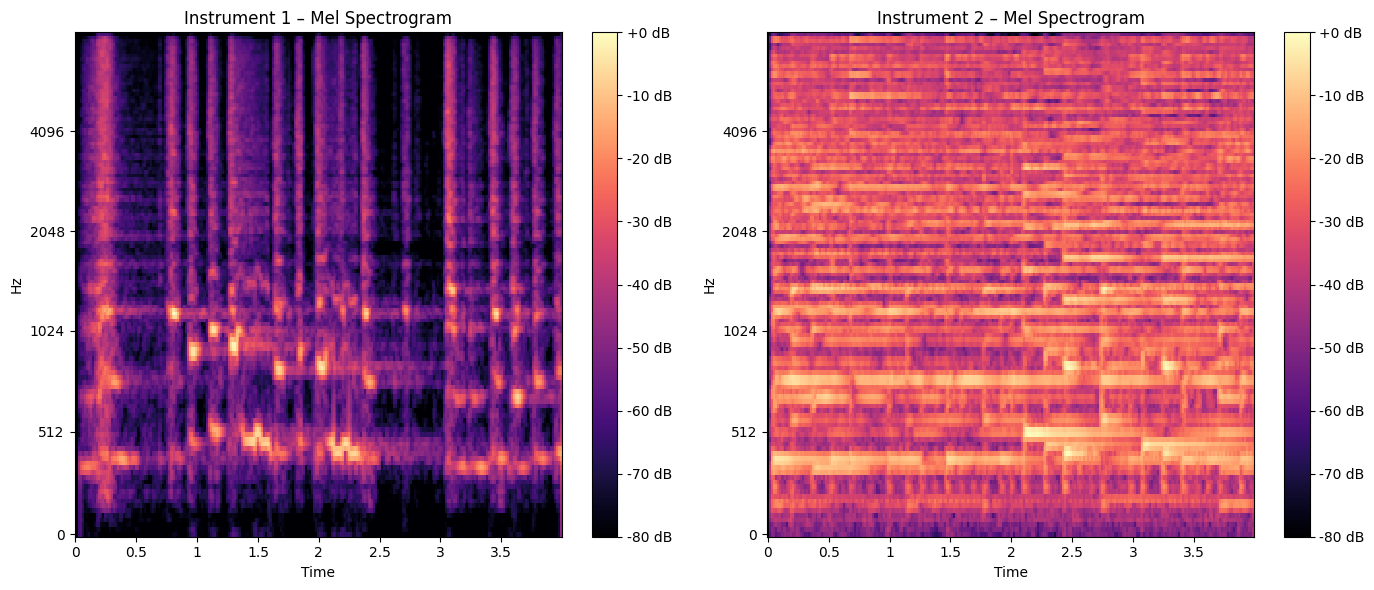

In [ ]:
#Plot Mel-Spectrogram Comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
librosa.display.specshow(instrument1_mel, sr=sr, hop_length=256,
                         x_axis="time", y_axis="mel")
plt.title("Instrument 1 – Mel Spectrogram")
plt.colorbar(format="%+2.0f dB")

plt.subplot(1, 2, 2)
librosa.display.specshow(instrument2_mel, sr=sr, hop_length=256,
                         x_axis="time", y_axis="mel")
plt.title("Instrument 2 – Mel Spectrogram")
plt.colorbar(format="%+2.0f dB")

plt.tight_layout()
plt.show()
